In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [2]:
# Values and file operations as given in Makedataset.py

time = 10 # we perform sampling for 10s
offset = 100 # we selct samples from 100th position of csv file
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"] #name of activity folders
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined") # Store path to Combined folder containing Train and Test Datasets.

In [3]:
# Now we obtain train datasets to perform EDA.

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train") # obtaining path to Train dataset

for folder in folders: # for each activity folder in Train
    files = os.listdir(os.path.join(dataset_dir,folder)) # we obtain a list of csv files in each activity folder

    for file in files: # for each subject csv file in the activity folder

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0) # we store its data in Dataframe df.
        df = df[offset:offset+time*50] # we store on 500 records starting from 100 to 600
        X_train.append(df.values) # we append values to X_train 
        y_train.append(classes[folder]) # # we append values to y_train 

# we convert the data series to numpy array
X_train = np.array(X_train) 
y_train = np.array(y_train)

In [4]:
X_train

array([[[ 0.1881076 ,  0.7867169 ,  0.5719042 ],
        [ 0.1900625 ,  0.7862243 ,  0.5730728 ],
        [ 0.190812  ,  0.7869899 ,  0.5735939 ],
        ...,
        [ 0.1889231 ,  0.7885494 ,  0.5731266 ],
        [ 0.1886773 ,  0.7865748 ,  0.5768984 ],
        [ 0.1875778 ,  0.7836999 ,  0.5770575 ]],

       [[ 0.2445142 ,  0.9502907 ,  0.1741417 ],
        [ 0.2446238 ,  0.9477933 ,  0.1760255 ],
        [ 0.2455519 ,  0.949285  ,  0.1804649 ],
        ...,
        [ 0.2375115 ,  0.953714  ,  0.1877969 ],
        [ 0.2415517 ,  0.9534246 ,  0.1888265 ],
        [ 0.2444603 ,  0.9515409 ,  0.1831854 ]],

       [[ 0.1797785 ,  0.5703901 ,  0.7951251 ],
        [ 0.1696251 ,  0.5697411 ,  0.7993438 ],
        [ 0.1648379 ,  0.5743193 ,  0.7988303 ],
        ...,
        [ 0.1714134 ,  0.5368416 ,  0.8193696 ],
        [ 0.1698416 ,  0.5379902 ,  0.8180535 ],
        [ 0.1696353 ,  0.5383922 ,  0.8185209 ]],

       ...,

       [[ 0.6953472 , -0.2385619 , -0.0915223 ],
        [ 0

In [5]:
X_train.shape # 126 windows with each having 500 rows and 3 columns

(126, 500, 3)

In [6]:
y_train 

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y_train.shape # contain activity code for each window 

(126,)

In [8]:
activity_dictionary={1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

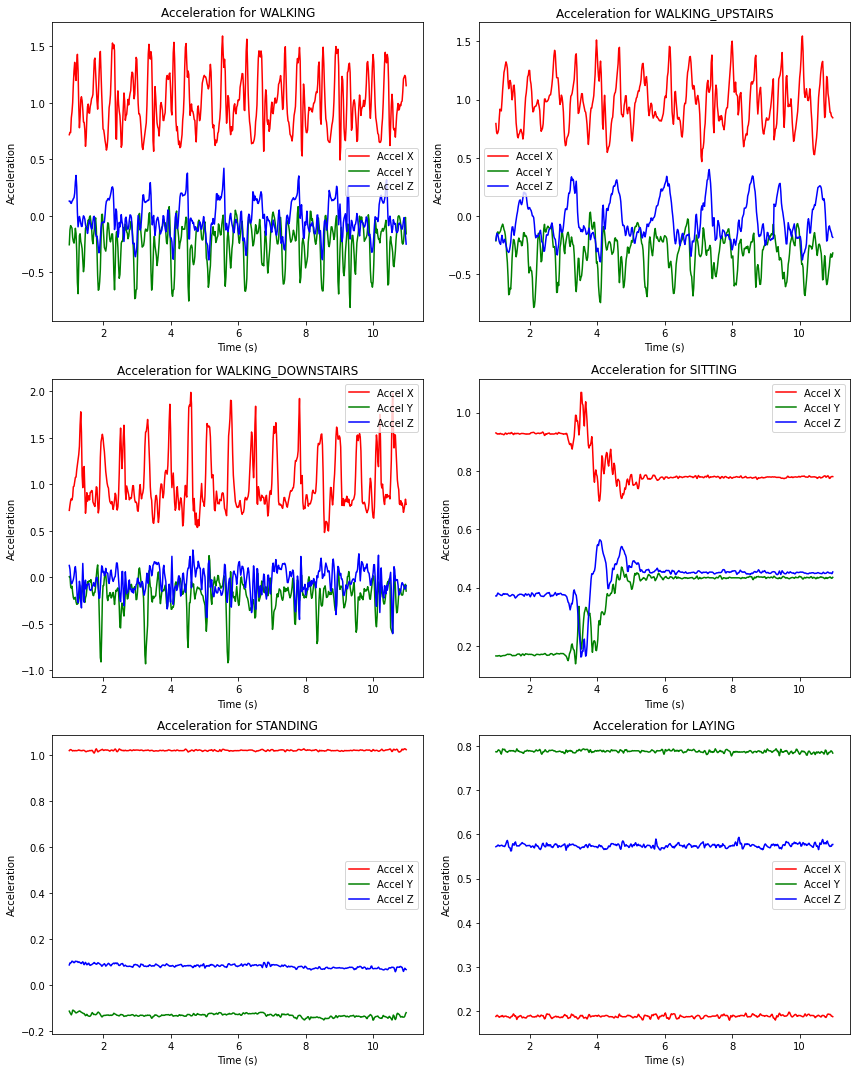

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for act_code in activity_dictionary.keys():
    matching_indices=np.where(y_train==act_code)[0]#we get tuple so we obtain first one by indexing 
    
    if matching_indices.size > 0:
    
        window_index=matching_indices[0]
        X_train_window=X_train[window_index,:,:]
        accel_x=X_train_window[:,0]
        accel_y=X_train_window[:,1]
        accel_z=X_train_window[:,2]# from the window we obtain full rows of 0th, 1st and 2nd column
        x=np.arange(1,11,0.02)#considering 1st 10s with sampling frequency of 50Hz
        ax = axes[act_code - 1]  # Adjusting index since keys are 1-based
        ax.plot(x, accel_x, label='Accel X', color='r')
        ax.plot(x, accel_y, label='Accel Y', color='g')
        ax.plot(x, accel_z, label='Accel Z', color='b')
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Acceleration")
        ax.set_title(f'Acceleration for {activity_dictionary[act_code]}')
        ax.legend()
    else:
        print("true")
        
plt.tight_layout()
plt.show()


### q2

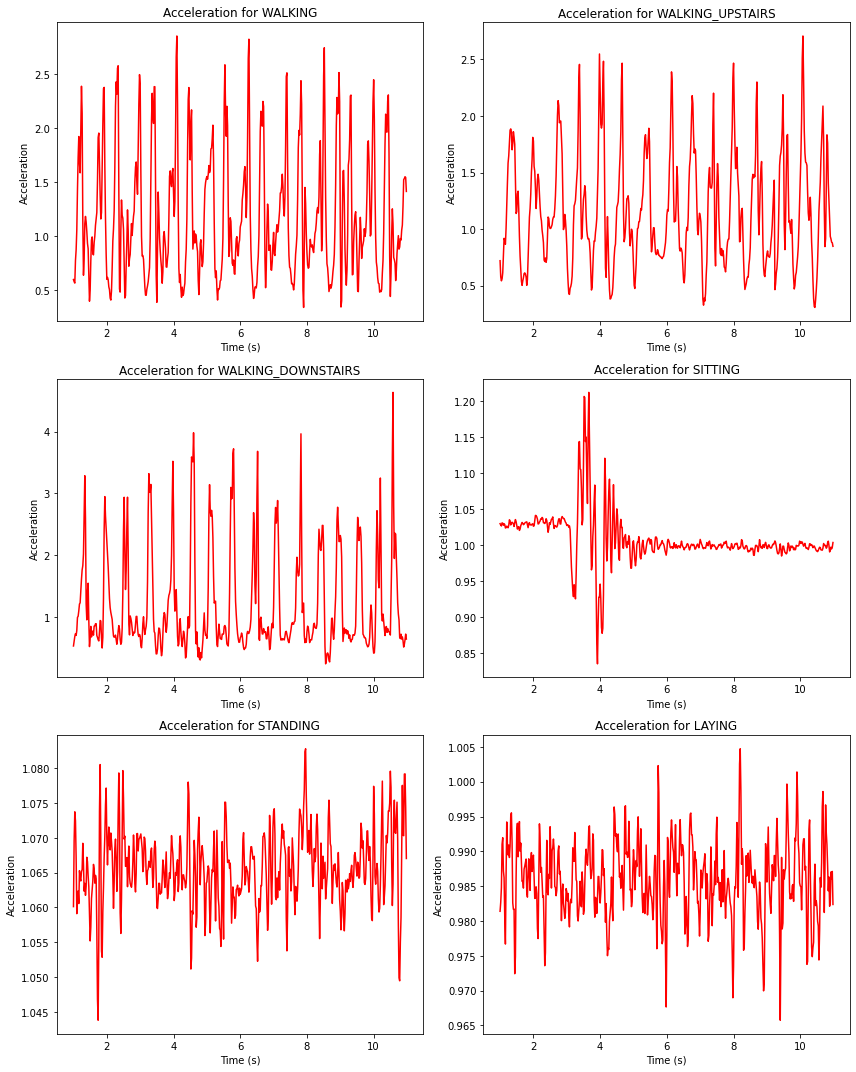

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()
for act_code in activity_dictionary.keys():
        matching_indices=np.where(y_train==act_code)[0]#we get tuple so we obtain first one by indexing 
    
        if matching_indices.size > 0:

            window_index=matching_indices[0]
            X_train_window=X_train[window_index,:,:]
            accel_x=X_train_window[:,0]
            accel_y=X_train_window[:,1]
            accel_z=X_train_window[:,2]# from the window we obtain full rows of 0th, 1st and 2nd column
            accel_net_sqr = accel_x**2 + accel_y**2 +accel_z**2
            x=np.arange(1,11,0.02)#considering 1st 10s with sampling frequency of 50Hz
            ax = axes[act_code - 1]  # Adjusting index since keys are 1-based
            ax.plot(x, accel_net_sqr, color='r')
            ax.set_xlabel("Time (s)")
            ax.set_ylabel("Acceleration")
            ax.set_title(f'Acceleration for {activity_dictionary[act_code]}')
        else:
            print("true")

plt.tight_layout()
plt.show()


## q3

In [11]:
X_train.shape

(126, 500, 3)

In [12]:
total_accel=np.sum(X_train**2,axis=2)#sum along third dim 3 i.e.of columns
from sklearn.preprocessing import StandardScaler # we can also use min_max_scaler for standardization
scaler=StandardScaler()
scaler.fit(total_accel)
scaled_data=scaler.transform(total_accel)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

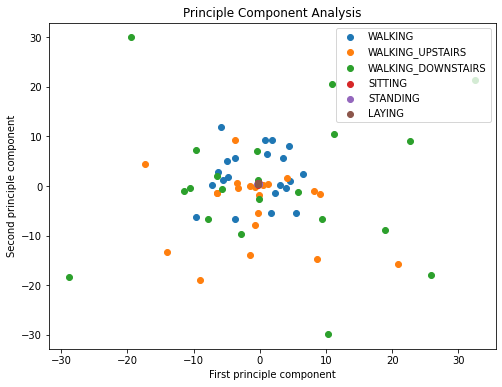

In [13]:
plt.figure(figsize=(8,6))

for act_code,activity in activity_dictionary.items():
    rows=np.where(y_train==act_code)
    plt.scatter(x_pca[rows,0],x_pca[rows,1],label=activity)
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')
    plt.title('Principle Component Analysis')
plt.legend()
plt.show()

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
(126, 120)


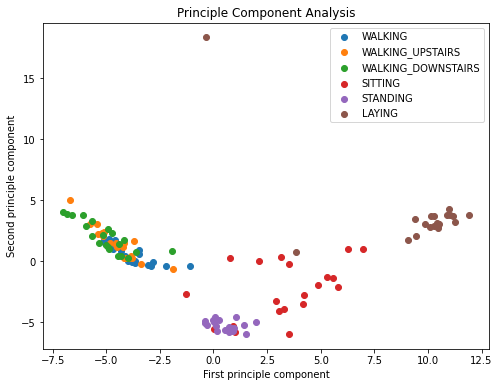

(126, 120)
(126,)


In [14]:
import tsfel
import pandas as pd
from sklearn.preprocessing import StandardScaler

train_tsfel_features_list = []

# Loop through each window in X_train
for i in range(X_train.shape[0]):
    # Flatten the current window and create a DataFrame
    train_data_for_tsfel = pd.DataFrame({
        'x_comp': X_train[i, :, 0],
        'y_comp': X_train[i, :, 1],
        'z_comp': X_train[i, :, 2]
    })

    # Get TSFEL configuration for statistical features
    cfg = tsfel.get_features_by_domain('statistical')

    # Extract features for the current window
    train_features = tsfel.time_series_features_extractor(cfg, train_data_for_tsfel, fs=50)
    
    # Append the extracted features to the list
    train_tsfel_features_list.append(train_features)

# Combine the features from all windows into a single DataFrame
train_tsfel_features_df = pd.concat(train_tsfel_features_list, ignore_index=True)

# Standardize the features
scaler = StandardScaler()
train_standardized_tsfel_features = scaler.fit_transform(train_tsfel_features_df)

# Display the shape of standardized features
print(train_standardized_tsfel_features.shape)

# Proceed with PCA or any other analysis as needed
from sklearn.decomposition import PCA
pca_tsfel=PCA(n_components=2)
pca_tsfel.fit(train_standardized_tsfel_features)
x_pca_tsfel=pca_tsfel.transform(train_standardized_tsfel_features)
plt.figure(figsize=(8,6))

for act_code,activity in activity_dictionary.items():
    rows=np.where(y_train==act_code)
    plt.scatter(x_pca_tsfel[rows,0],x_pca_tsfel[rows,1],label=activity)
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')
    plt.title('Principle Component Analysis')
plt.legend()
plt.show()
print(train_standardized_tsfel_features.shape)
print(y_train.shape)

## 1 q3 c

In [15]:
X_train_data_path = "./UCI HAR Dataset/train/X_train.csv" 
X_train_dataset = pd.read_csv(X_train_data_path, header=None)
feature_names_path = "./UCI HAR Dataset/features.csv"
feature_names_df = pd.read_csv(feature_names_path, header=None)
feature_names = feature_names_df[0].tolist()
if len(feature_names) == X_train_dataset.shape[1]:
    X_train_dataset.columns = feature_names
y_train_data_path="./UCI HAR Dataset/train/y_train.csv"
y_train_dataset = pd.read_csv(y_train_data_path, header=None)
y_train_dataset.columns = ['Activity']


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_data = scaler.fit_transform(X_train_dataset)

print(f"Scaled data shape: {scaled_X_data.shape}")

Scaled data shape: (7352, 561)


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(scaled_X_data)

print(f"PCA-transformed data shape: {X_data_pca.shape}")

PCA-transformed data shape: (7352, 2)


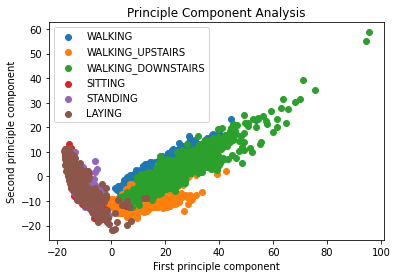

In [18]:
activity_dictionary={1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

for act_code,activity in activity_dictionary.items():
    rows=np.where(y_train_dataset==act_code)
    plt.scatter(X_data_pca[rows,0],X_data_pca[rows,1],label=activity)
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')
    plt.title('Principle Component Analysis')
plt.legend()
plt.show()

### q4

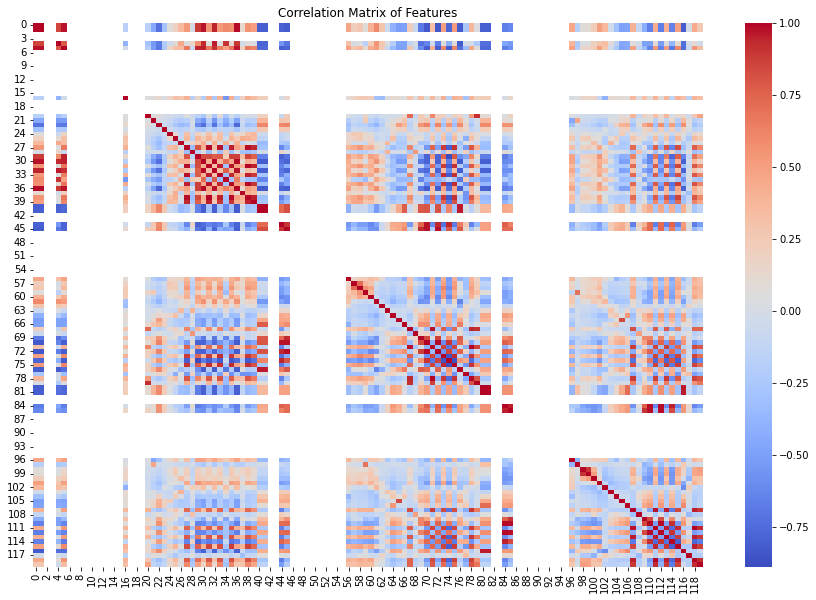

In [19]:
tsfel_df=pd.DataFrame(train_standardized_tsfel_features)

tsfel_corr_matr=pd.DataFrame(tsfel_df.corr())

tsfel_corr_matr.head()

import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(tsfel_corr_matr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

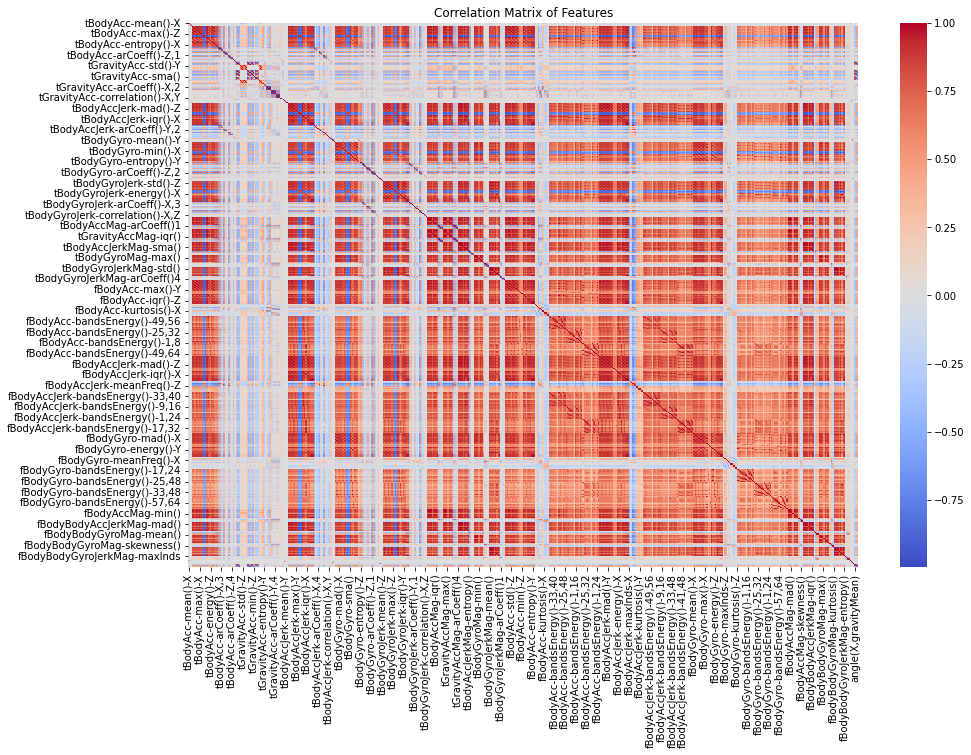

In [20]:
dataset_df=pd.DataFrame(scaled_X_data,columns=feature_names)

dataset_corr_matr=pd.DataFrame(dataset_df.corr())

dataset_corr_matr.head()

import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(dataset_corr_matr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Task 2

In [21]:
# We already had X_train, y_train, now we obtain X_test, y_test as well as validation set from remaining MakeDataset.py

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

from sklearn.model_selection import train_test_split

seed = 42
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=seed)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

Training data shape:  (88, 500, 3)
Testing data shape:  (54, 500, 3)
Validation data shape:  (38, 500, 3)


### q1 a.

In [22]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier(random_state=seed)

In [23]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [24]:
# flattenning X_train, X_test and X_val from 3D to 2D
X_train_flat=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_flat=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_val_flat=X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2])

dec_tree.fit(X_train_flat,y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred=dec_tree.predict(X_test_flat)

In [26]:
#now we have outputs from predictions. now we compare for various metrics.

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [28]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')#multiclass data
confusion_matrix=confusion_matrix(y_test,y_pred)

print(f"Accuracy : {accuracy}")
print(f"Recall : {recall}")
print(f"Precision : {precision}")
print(f"Confusion Matrix : \n{confusion_matrix}")

Accuracy : 0.48148148148148145
Recall : 0.48148148148148145
Precision : 0.39460393407761835
Confusion Matrix : 
[[5 0 1 4 0 0]
 [5 1 3 0 3 0]
 [1 0 2 2 0 1]
 [0 0 0 9 0 0]
 [0 4 0 4 0 0]
 [0 0 0 0 0 9]]


## q1 b

In [29]:
test_tsfel_features_list = []

# Loop through each window in X_train
for i in range(X_test.shape[0]):
    # Flatten the current window and create a DataFrame
    test_data_for_tsfel = pd.DataFrame({
        'x_comp': X_test[i, :, 0],
        'y_comp': X_test[i, :, 1],
        'z_comp': X_test[i, :, 2]
    })

    # Get TSFEL configuration for statistical features
    cfg = tsfel.get_features_by_domain('statistical')

    # Extract features for the current window
    test_features = tsfel.time_series_features_extractor(cfg, test_data_for_tsfel, fs=50)
    
    # Append the extracted features to the list
    test_tsfel_features_list.append(train_features)

# Combine the features from all windows into a single DataFrame
test_tsfel_features_df = pd.concat(test_tsfel_features_list, ignore_index=True)

# Standardize the features
scaler = StandardScaler()
test_standardized_tsfel_features = scaler.fit_transform(test_tsfel_features_df)

# Display the shape of standardized features
print(test_standardized_tsfel_features.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
(54, 120)


In [30]:
train_standardized_tsfel_features.shape

(126, 120)

In [31]:
y_train_val.shape

(126,)

In [32]:
test_standardized_tsfel_features.shape

(54, 120)

In [33]:
y_test.shape

(54,)

In [34]:
X_tsfel = np.concatenate((train_standardized_tsfel_features,test_standardized_tsfel_features))
y_tsfel = np.concatenate((y_train_val,y_test))
X_train_val_tsfel, X_test_tsfel, y_train_val_tsfel, y_test_tsfel = train_test_split(X_tsfel, y, test_size=0.3, random_state=seed,stratify=y)
X_train_tsfel, X_val_tsfel, y_train_tsfel, y_val_tsfel = train_test_split(X_train_val_tsfel, y_train_val_tsfel, test_size=0.3, random_state=seed)


In [35]:
X_train.shape

(88, 500, 3)

In [36]:
y_train.shape

(88,)

In [37]:
print("Unique values in y_train_tsfel:", np.unique(y_train_tsfel))
print("Unique values in y_test_tsfel:", np.unique(y_test_tsfel))
print("X_train_tsfel shape:", X_train_tsfel.shape)
print("y_train_tsfel shape:", y_train_tsfel.shape)
print("X_test_tsfel shape:", X_test_tsfel.shape)
print("y_test_tsfel shape:", y_test_tsfel.shape)


Unique values in y_train_tsfel: [1 2 3 4 5 6]
Unique values in y_test_tsfel: [1 2 3 4 5 6]
X_train_tsfel shape: (88, 120)
y_train_tsfel shape: (88,)
X_test_tsfel shape: (54, 120)
y_test_tsfel shape: (54,)


In [38]:
dec_tree.fit(X_train_tsfel, y_train_tsfel)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred_tsfel=dec_tree.predict(X_test_tsfel)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy_tsfel=accuracy_score(y_test_tsfel,y_pred_tsfel)
recall_tsfel=recall_score(y_test_tsfel,y_pred_tsfel, average='weighted')
precision_tsfel=precision_score(y_test_tsfel,y_pred_tsfel, average='weighted')#multiclass data
confusion_matrix_tsfel=confusion_matrix(y_test_tsfel,y_pred_tsfel)

print(f"Accuracy : {accuracy_tsfel}")
print(f"Recall : {recall_tsfel}")
print(f"Precision : {precision_tsfel}")
print(f"Confusion Matrix : \n{confusion_matrix_tsfel}")

Accuracy : 0.5925925925925926
Recall : 0.5925925925925926
Precision : 0.7166666666666667
Confusion Matrix : 
[[4 2 3 0 0 0]
 [3 3 3 0 0 0]
 [3 0 6 0 0 0]
 [0 0 3 6 0 0]
 [0 0 3 0 6 0]
 [0 0 2 0 0 7]]


### q1 c

In [41]:
# we have extracted x_train_dataset,and y_train_dataset. now test

In [42]:
X_test_data_path = "./UCI HAR Dataset/test/X_test.csv" 
X_test_dataset = pd.read_csv(X_test_data_path, header=None)
feature_names_path = "./UCI HAR Dataset/features.csv"
feature_names_df = pd.read_csv(feature_names_path, header=None)
feature_names = feature_names_df[0].tolist()
if len(feature_names) == X_test_dataset.shape[1]:
    X_test_dataset.columns = feature_names
y_test_data_path="./UCI HAR Dataset/test/y_test.csv"
y_test_dataset = pd.read_csv(y_test_data_path, header=None)
y_test_dataset.columns = ['Activity']


In [43]:
X_dataset = np.concatenate((X_train_dataset,X_test_dataset))
y_dataset = np.concatenate((y_train_dataset,y_test_dataset))

from sklearn.model_selection import train_test_split

X_dataset_train_val, X_dataset_test,y_dataset_train_val,y_dataset_test=train_test_split(X_dataset,y_dataset, test_size=0.3,random_state=seed)
X_dataset_train, X_dataset_val,y_dataset_train,y_dataset_val=train_test_split(X_dataset_train_val,y_dataset_train_val, test_size=0.3,random_state=seed)

In [44]:
dec_tree.fit(X_dataset_train, y_dataset_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_dataset_pred=dec_tree.predict(X_dataset_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy_dataset=accuracy_score(y_dataset_test,y_dataset_pred)
recall_dataset=recall_score(y_dataset_test,y_dataset_pred, average='weighted')
precision_dataset=precision_score(y_dataset_test,y_dataset_pred, average='weighted')#multiclass data
confusion_matrix_dataset=confusion_matrix(y_dataset_test,y_dataset_pred)

print(f"Accuracy : {accuracy_dataset}")
print(f"Recall : {recall_dataset}")
print(f"Precision : {precision_dataset}")
print(f"Confusion Matrix : \n{confusion_matrix_dataset}")

Accuracy : 0.9058252427184466
Recall : 0.9058252427184466
Precision : 0.9057552612025831
Confusion Matrix : 
[[511  13  15   0   0   0]
 [ 21 369  34   0   0   0]
 [ 19  28 373   0   0   0]
 [  0   1   0 477  85   0]
 [  1   0   0  74 472   0]
 [  0   0   0   0   0 597]]


## Q2

range(2, 9)
[0.4074074074074074, 0.5, 0.5370370370370371, 0.48148148148148145, 0.5, 0.5740740740740741, 0.5]
[0.5185185185185185, 0.6666666666666666, 0.5925925925925926, 0.6111111111111112, 0.5925925925925926, 0.5925925925925926, 0.5925925925925926]
[0.544336569579288, 0.7815533980582524, 0.870873786407767, 0.8938511326860842, 0.8964401294498382, 0.9032362459546925, 0.9097087378640777]


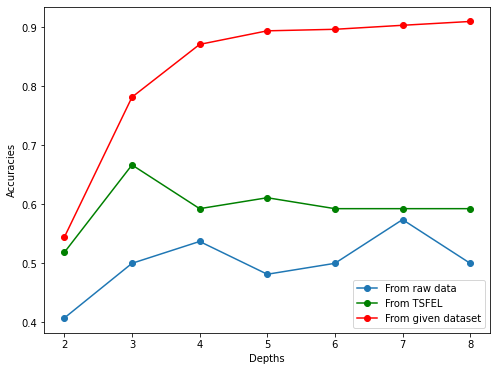

In [47]:
depth_list=range(2,9)
accuracy_list1=[]
accuracy_list2=[]
accuracy_list3=[]

for d in depth_list:
    
    dtc1=DecisionTreeClassifier(max_depth=d,random_state=42)
    dtc2=DecisionTreeClassifier(max_depth=d,random_state=42)
    dtc3=DecisionTreeClassifier(max_depth=d,random_state=42)
    
    dtc1.fit(X_train_flat,y_train)
    y_pred_for_1=dtc1.predict(X_test_flat)
    acc_1=accuracy_score(y_test,y_pred_for_1)

    dtc2.fit(X_train_tsfel, y_train_tsfel)
    y_pred_for_2=dtc2.predict(X_test_tsfel)
    acc_2=accuracy_score(y_test_tsfel,y_pred_for_2)

    dtc3.fit(X_dataset_train, y_dataset_train)
    y_pred_for_3=dtc3.predict(X_dataset_test)
    acc_3=accuracy_score(y_dataset_test,y_pred_for_3)
    
    accuracy_list1.append(acc_1)
    accuracy_list2.append(acc_2)
    accuracy_list3.append(acc_3)
    
print(depth_list)
print(accuracy_list1)
print(accuracy_list2)
print(accuracy_list3)

plt.figure(figsize=(8,6))

plt.plot(depth_list,accuracy_list1,marker="o",label="From raw data")
plt.plot(depth_list,accuracy_list2,marker="o",color="Green",label="From TSFEL")
plt.plot(depth_list,accuracy_list3,marker="o",color="Red",label="From given dataset")

plt.xlabel("Depths")
plt.ylabel("Accuracies")
plt.legend()
plt.show()